Seguridad Radiológica 2024-2

***

## Primer Examen Parcial.

#### Karla Lilí Velasco Butrón.

Una persona acaba de adquirir una moneda elaborada supuestamente de oro rojo. Para determinar si esto es verdad decidió pedirle a una amistad con acceso a una fuente de neutrones que la activara usando dicha fuente, para poder determinar la composición de la moneda. Al llevar a cabo la activación neutrónica de la moneda se obtuvieron los datos de decaimiento que se encuentran en el archivo de Excel anexo. Utilizando estos datos, determina las vidas medias de los radionúclidos que conforman la muestra y responde si la moneda es o no de oro rojo.

Vida media 1: 242932.03056216254 ± 125.30370984319018 segundos
Vida media 2: 313323.1252930883 ± 38.45571276549434 segundos
Vida media 3: 331627.1116382964 ± 7.699706474000676 segundos


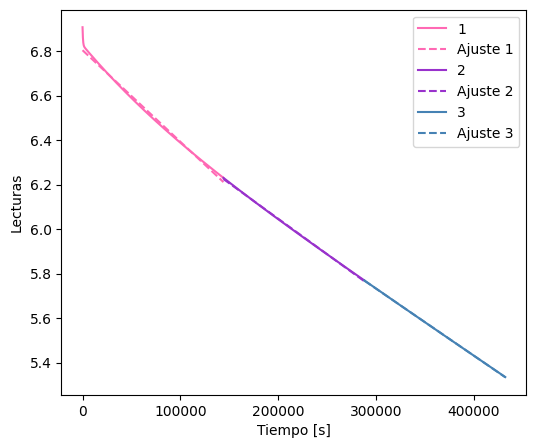

In [2]:
# Importamos las bibliotecas a utilizar.
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Importamos los datos desde el archivo Excel dado por el profesor (cambiar dirección según donde se encuentre).
Datos = pd.read_excel("C:/Users/USUARIO/Downloads/Datos_Oro_rojo.xlsx", header = 0)

# Segmentamos los datos.
n = len(Datos)
vida_media1 = Datos.iloc[:n // 3]
vida_media2 = Datos.iloc[n // 3:2 * n // 3]
vida_media3 = Datos.iloc[2 * n // 3:]

# Definimos la función de decaimiento exponencial.
def Decaimiento(t, N0, lambd):
    return np.log(N0) - lambd * t

# Igualmente, definimos una función para ajustar los datos.
def Ajuste(Datos, etiqueta, color):
    popt, pcov = curve_fit(Decaimiento, Datos['tiempo [s]'], np.log(Datos['lecturas']))
    perr = np.sqrt(np.diag(pcov))

    # Graficamos los datos y el ajuste.
    plt.plot(Datos['tiempo [s]'], np.log(Datos['lecturas']), label = etiqueta, color = color)
    plt.plot(Datos['tiempo [s]'], Decaimiento(Datos['tiempo [s]'], *popt), '--',
             label = f'Ajuste {etiqueta}', color = color)

     # Mostramos la vida media calculada a partir del ajuste.
    print(f'Vida media {etiqueta}: {1 / popt[1]} ± {perr[1] / popt[1] ** 2} segundos')

# Graficamos todo junto.
plt.figure(figsize=(6, 5))
Ajuste(vida_media1, '1', 'hotpink')  
Ajuste(vida_media2, '2', 'darkorchid')     
Ajuste(vida_media3, '3', 'steelblue')   
plt.xlabel('Tiempo [s]')
plt.ylabel('Lecturas')
plt.legend()
plt.show()

Dado que el oro rojo está compuesto principalmente de oro y cobre, podemos hacer algunas comparaciones basadas en las vidas medias de los isótopos de oro y cobre conocidos, por lo tanto, comparando estas con los resultados proporcionados podemos notar que ninguna de las vidas medias coincide exactamente con la vida media esperada de Au-198 ni con las vidas medias muy cortas típicas de Cu-64 y Cu-66 así que no podemos concluir definitivamente si la moneda es de oro rojo basándonos únicamente en estos datos y se necesitarían más análisis y pruebas para determinar con certeza su composición.